In [1]:
! pip install edinet-xbrl

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 

In [ ]:
# ファイルパスのパターンにワイルドカードを使うので必要
import glob
# xbrl解析に必要
from edinet_xbrl.edinet_xbrl_parser import EdinetXbrlParser
# 不必要なタグ・スペースを除去するのに必要
import re

In [23]:
def Business_risk(file_name_list):
    #パーサのインスタンス化
    parser = EdinetXbrlParser()

    for file_name in file_name_list:
        xbrl_path = f"influencer_marketing_data_set/{file_name}/S*/XBRL/PublicDoc/*.xbrl"


        xbrl_path_all = glob.glob(xbrl_path)
        print(xbrl_path_all)

        xbrl_path = glob.glob(xbrl_path)[0]

        edinet_xbrl_object = parser.parse_file(xbrl_path)

        # 事業等のリスクをとってみる
        # <jpcrp_cor:BusinessRisksTextBlock contextRef="FilingDateInstant">
        # ってところに事業等のリスクがあるので
        key='jpcrp_cor:BusinessRisksTextBlock'
        context_ref='FilingDateInstant'
        data = edinet_xbrl_object.get_data_by_context_ref(key, context_ref)
        text_data = data.get_value()

        # 空白（\s）除去
        text_data = re.sub('\s','',text_data)
        # 任意の文字数のタグ（<.*?>）の除去
        text_data = re.sub('<.*?>','',text_data)

        # テキストデータの保存
        text_file = open(f'Business_risk/{file_name}_Business_risk.txt', 'w', encoding='UTF-8')
        text_file.write(text_data)
        text_file.close()

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rhamano\AppData\Local\Temp\ipykernel_8360\134517061.py:25: SyntaxWarning: invalid escape sequence '\s'
  text_data = re.sub('\s','',text_data)


In [24]:
file_name_list = ["anymindgroup_2023","cyberbuzz_2023","trenders_2023"]
Business_risk(file_name_list)

['influencer_marketing_data_set/anymindgroup_2023\\S100QHY2\\XBRL\\PublicDoc\\jpcrp030000-asr-001_E37466-000_2022-12-31_01_2023-03-30.xbrl']
['influencer_marketing_data_set/cyberbuzz_2023\\S100SGQG\\XBRL\\PublicDoc\\jpcrp030000-asr-001_E35089-000_2023-09-30_01_2023-12-14.xbrl']
['influencer_marketing_data_set/trenders_2023\\S100R4DE\\XBRL\\PublicDoc\\jpcrp030000-asr-001_E26933-000_2023-03-31_01_2023-06-26.xbrl']


In [1]:
! pip install pandas
! pip install MeCab

In [6]:
! pip install pandas 
! pip install matplotlib

In [9]:
# インポート類
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt

text_paths = ["Business_risk/anymindgroup_2023_Business_risk.txt", "Business_risk/cyberbuzz_2023_Business_risk.txt", "Business_risk/trenders_2023_Business_risk.txt"]
documents = []

for i in text_paths:
    with open(i, mode='r', encoding='UTF-8') as f:
        content = f.read()
        # 三つのテキストデータを一つにまとめる
        documents.append(content)

print(documents)




C:\Users\ryoun\AppData\Local\Temp\ipykernel_40588\989203240.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['２【事業等のリスク】本書に記載した事業の状況、経理の状況等に関する事項のうち、投資者の判断に重要な影響を及ぼす可能性のある事項には下記のようなものがあります。なお、これらは、当社グループが事業を遂行する上で発生しうるすべてのリスクを網羅しているものではありません。また、文中における将来に関する事項につきましては別段の記載のない限り、本書提出日現在において当社グループが判断したものであります。(1)事業環境にかかわるリスク①参入市場について（顕在化の可能性：低、顕在化の時期：長期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場では、スマートフォン市場の成長やブロードバンドの普及、新しいテクノロジーの活用により拡大傾向にあります。当社グループはこの成長は継続するものと見込んでおり、現在展開市場を軸に多角的に事業を展開する計画であります。しかしながら、今後国内外の経済情勢や景気動向等の理由により市場成長が鈍化、若しくは市場環境が変化するような場合には、当社グループ財政状態や経営成績に影響を及ぼす可能性があります。②技術革新等について（顕在化の可能性：中、顕在化の時期：長期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場では、技術革新や顧客ニーズの変化のスピードが非常に早く、事業者はその変化に柔軟に対応する必要があります。当社グループにおいても、最新の技術や市場環境の変化を迅速に対応できるよう努めております。しかしながら、当社グループが技術革新や顧客ニーズの変化に対応できない場合、また変化の対応のためのシステムや人件費に多くの投資を要する場合、当社グループの財政状態や経営成績に影響を及ぼす可能性があります。③他社との競合について（顕在化の可能性：中、顕在化の時期：中期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場においては、多くの企業が事業展開しております。当社グループは展開領域において技術力や事業展開力を活かして高付加価値のサービスを提供することで市場における優位性を確立し、競争力を向上させてまいりました。今後もクライアント目線に立って

In [10]:
import MeCab

# 単語のリストを作る
words_list = []

# MeCabを初期化する
tagger = MeCab.Tagger()

# 生成する辞書
word2int = {}
i = 0

print(documents[0])

２【事業等のリスク】本書に記載した事業の状況、経理の状況等に関する事項のうち、投資者の判断に重要な影響を及ぼす可能性のある事項には下記のようなものがあります。なお、これらは、当社グループが事業を遂行する上で発生しうるすべてのリスクを網羅しているものではありません。また、文中における将来に関する事項につきましては別段の記載のない限り、本書提出日現在において当社グループが判断したものであります。(1)事業環境にかかわるリスク①参入市場について（顕在化の可能性：低、顕在化の時期：長期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場では、スマートフォン市場の成長やブロードバンドの普及、新しいテクノロジーの活用により拡大傾向にあります。当社グループはこの成長は継続するものと見込んでおり、現在展開市場を軸に多角的に事業を展開する計画であります。しかしながら、今後国内外の経済情勢や景気動向等の理由により市場成長が鈍化、若しくは市場環境が変化するような場合には、当社グループ財政状態や経営成績に影響を及ぼす可能性があります。②技術革新等について（顕在化の可能性：中、顕在化の時期：長期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場では、技術革新や顧客ニーズの変化のスピードが非常に早く、事業者はその変化に柔軟に対応する必要があります。当社グループにおいても、最新の技術や市場環境の変化を迅速に対応できるよう努めております。しかしながら、当社グループが技術革新や顧客ニーズの変化に対応できない場合、また変化の対応のためのシステムや人件費に多くの投資を要する場合、当社グループの財政状態や経営成績に影響を及ぼす可能性があります。③他社との競合について（顕在化の可能性：中、顕在化の時期：中期）当社グループが事業を展開しているEC市場、インフルエンサーマーケティング市場、デジタルマーケティング市場、オンライン動画市場においては、多くの企業が事業展開しております。当社グループは展開領域において技術力や事業展開力を活かして高付加価値のサービスを提供することで市場における優位性を確立し、競争力を向上させてまいりました。今後もクライアント目線に立ってサー

In [30]:
# 形態素解析して辞書に入れていく
dataframes_list = []

# documents = [[文書1],[文書2]]
for idx, sentence in enumerate(documents):
    sentence_parced = tagger.parseToNode(sentence)
    parse_list = []
    while sentence_parced:
        # 単語の取り出し
        surface_and_feature = f"{sentence_parced.surface},{sentence_parced.feature}"
        *surface_and_feature, = surface_and_feature.split(",")
        parse_list.append(surface_and_feature)
        # 次の行へ
        sentence_parced = sentence_parced.next
    # データフレーム作成
    columns_list = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
    df = pd.DataFrame(data=parse_list,columns = columns_list)
       # リストにデータフレームを追加
    dataframes_list.append(df)

for idx, df in enumerate(dataframes_list):
    (f"DataFrame {idx + 1}:\n{df}\n")
    print("df_",{idx + 1})
    display(df)

df_ {1}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,２,名詞,数,*,*,*,*,２,ニ,ニ
2,【,記号,括弧開,*,*,*,*,【,【,【
3,事業,名詞,一般,*,*,*,*,事業,ジギョウ,ジギョー
4,等,名詞,接尾,一般,*,*,*,等,トウ,トー
...,...,...,...,...,...,...,...,...,...,...
4018,で,助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
4019,あり,助動詞,*,*,*,五段・ラ行アル,連用形,ある,アリ,アリ
4020,ます,助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
4021,。,記号,句点,*,*,*,*,。,。,。


df_ {2}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,３,名詞,数,*,*,*,*,３,サン,サン
2,【,記号,括弧開,*,*,*,*,【,【,【
3,事業,名詞,一般,*,*,*,*,事業,ジギョウ,ジギョー
4,等,名詞,接尾,一般,*,*,*,等,トウ,トー
...,...,...,...,...,...,...,...,...,...,...
3373,て,助詞,接続助詞,*,*,*,*,て,テ,テ
3374,おり,動詞,非自立,*,*,五段・ラ行,連用形,おる,オリ,オリ
3375,ます,助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
3376,。,記号,句点,*,*,*,*,。,。,。


df_ {3}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,３,名詞,数,*,*,*,*,３,サン,サン
2,【,記号,括弧開,*,*,*,*,【,【,【
3,事業,名詞,一般,*,*,*,*,事業,ジギョウ,ジギョー
4,等,名詞,接尾,一般,*,*,*,等,トウ,トー
...,...,...,...,...,...,...,...,...,...,...
1767,が,助詞,格助詞,一般,*,*,*,が,ガ,ガ
1768,あり,動詞,自立,*,*,五段・ラ行,連用形,ある,アリ,アリ
1769,ます,助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
1770,。,記号,句点,*,*,*,*,。,。,。


In [34]:
display(df.groupby(['原形', '品詞']).size().sort_values(ascending=False))

原形   品詞
の    助詞    108
、    記号     98
が    助詞     65
に    助詞     56
する   動詞     55
          ... 
に対し  助詞      1
役    名詞      1
従業   名詞      1
復旧   名詞      1
４    名詞      1
Length: 412, dtype: int64

In [35]:
noun = df.loc[df['品詞'] == '名詞']
noun 

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
1,３,名詞,数,*,*,*,*,３,サン,サン
3,事業,名詞,一般,*,*,*,*,事業,ジギョウ,ジギョー
4,等,名詞,接尾,一般,*,*,*,等,トウ,トー
6,リスク,名詞,一般,*,*,*,*,リスク,リスク,リスク
8,本書,名詞,一般,*,*,*,*,本書,ホンショ,ホンショ
...,...,...,...,...,...,...,...,...,...,...
1759,配当,名詞,サ変接続,*,*,*,*,配当,ハイトウ,ハイトー
1760,政策,名詞,一般,*,*,*,*,政策,セイサク,セイサク
1762,影響,名詞,サ変接続,*,*,*,*,影響,エイキョウ,エイキョー
1765,可能,名詞,形容動詞語幹,*,*,*,*,可能,カノウ,カノー


In [37]:
verb = df.loc[df['品詞'] == '動詞']
verb

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
11,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
51,与える,動詞,自立,*,*,一段,基本形,与える,アタエル,アタエル
55,ある,動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル
58,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
60,いる,動詞,非自立,*,*,一段,基本形,いる,イル,イル
...,...,...,...,...,...,...,...,...,...,...
1708,できる,動詞,自立,*,*,一段,基本形,できる,デキル,デキル
1738,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
1740,おり,動詞,非自立,*,*,五段・ラ行,連用形,おる,オリ,オリ
1764,及ぼす,動詞,自立,*,*,五段・サ行,基本形,及ぼす,オヨボス,オヨボス


In [39]:

from collections import Counter
from IPython.display import display
import seaborn as sns

font_path = 'C:/Windows/Fonts/msgothic.ttc'  # フォントのパスを修正
# ストップワードファイルを読み込む
with open('stopwords.txt', mode='r', encoding='UTF-8') as f:
    stop_words = f.read().split()

count = noun.groupby('原形').size().sort_values(ascending=False)
count.name = 'count'
count = count.reset_index().head(10)
count



,原形,count
0,*,45
1,当社,34
2,グループ,33
3,等,21
4,性,19
5,場合,18
6,可能,17
7,リスク,16
8,業績,15
9,影響,14


<Axes: xlabel='原形', ylabel='count'>

C:\Users\ryoun\AppData\Roaming\Python\Python312-32\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from current font.
  func(*args, **kwargs)
C:\Users\ryoun\AppData\Roaming\Python\Python312-32\site-packages\IPython\core\events.py:82: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from current font.
  func(*args, **kwargs)
C:\Users\ryoun\AppData\Roaming\Python\Python312-32\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ryoun\AppData\Roaming\Python\Python312-32\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ryoun\AppData\Roaming\Python\Python312-32\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)

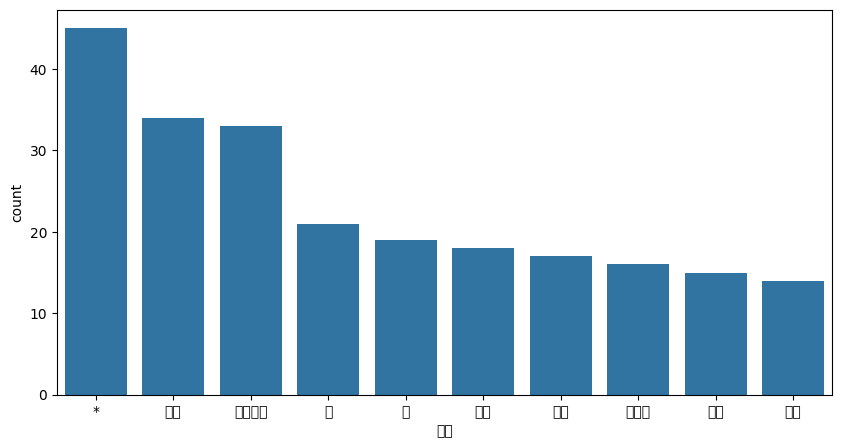

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x=count['原形'], y=count['count'])